# Likelihood Functions <br>
We basically use these to predict unkown coefficients for known functions. Ignore this. <br>
Say, we have a sample x = <$x_1, x_2, ..., x_n$>, which we know is drawn from a Bernoulli distribution, with parameter p, independently. Can we predict the value of p, given x? <br>
A simpler example would be if we have a biased coin with probability of heads 0.7, and we toss it n times, to get 7 heads. What is the likely value of n? <br>
P(7|n, p) = ${n \choose 7} 0.75^7 0.25^{n - 7}$ <br>
Let's maximise it to see the maximum likely value of n.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def PFunc(n):
    return math.factorial(n)/(math.factorial(7) * math.factorial(n - 7)) * 0.75**7 * 0.25**(n - 7)

In [20]:
X = np.arange(7, 21)
Y = np.vectorize(PFunc)(X)

In [18]:
X

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [21]:
Y

array([1.33483887e-01, 2.66967773e-01, 3.00338745e-01, 2.50282288e-01,
       1.72069073e-01, 1.03241444e-01, 5.59224486e-02, 2.79612243e-02,
       1.31068239e-02, 5.82525507e-03, 2.47573340e-03, 1.01280003e-03,
       4.00900011e-04, 1.54192312e-04])

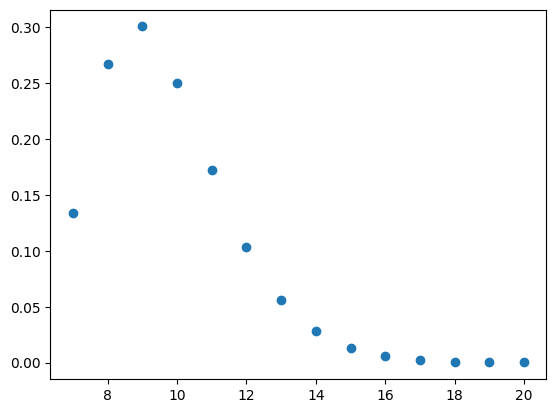

In [4]:
plt.scatter(X, Y)

We use similar ideas for Continous distributions, but when we have many samples, we use a joint distribution. Let's look at the Bernoulli example. <br>
$L(p|x) = f(x_1, x_2, ..., x_n|p) = (p^{x_1} (1 - p)^{1 - x_1})(p^{x_2} (1 - p)^{1 - x_2})...(p^{x_n} (1 - p)^{1 - x_n})$
<br>
This is hard to maximise this, so let us try to maximise another function.
<br>
$l(p|x) = log(L(p|x)) = log(p)\Sigma_i(x_i) + log(1 - p)\Sigma_i(1 - x_i)$
<br>
Using basic differentiation, you'll get this to to be $\hat{p} = \bar{x}_n$.

### Try to understand why maximising l(p) also maximises L(p).

# Newton Raphson Method

### We use this method to find the roots of functions. 
<br>
Let us say we need to approximate the value of $\sqrt2$. We have $\sqrt2$ as the root of the function f(x) = $x^2 - 2$

$f'(x_0) \approx \frac{f(x) - f(x_0)}{x - x_0}$
<br>
We go by iteration, and we try to stop when f(x) = 0.
<br>
$f(x) - f(x_0) = f'(x_0)x - f'(x_0)x_0$
<br>
Set f(x) = 0, and iteratively,
<br>
$-f(x_0) = f'(x_0)x_1 - f'(x_0)x_0$
<br>
$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$
<br>
Stop when we get an $x_i$ with $f(x_i)$ close enough to 0.

In [34]:
def newRaphSquare(epsilon = 1e-4, iters = 1e3, start = 5):
    x = start
    L = [x]
    it = 0
    while x**2 - 2 > epsilon:
        x = x - (x**2 - 2)/(2*x)
        L.append(x)
        it += 1
        if it == iters:
            print("DNC")
            break
    L.append(x)
    return np.array(L)

In [35]:
X = newRaphSquare(start = 1e-3)

In [36]:
X

array([0.001, 0.001])

In [37]:
Y = X**2 - 2

In [38]:
Y

array([-1.999999, -1.999999])

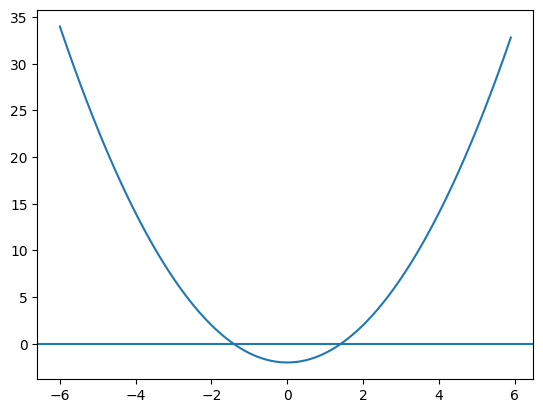

In [39]:
x = np.arange(-6, 6, 0.1)
y = x**2 - 2
plt.plot(x, y)
plt.axhline(0)
plt.plot(X, Y)

### Try different starting values. Go higher. Try as low as $10^{-3}$. Go into negative values, and see where it converges.

### We could directly expand this to more dimensions by converting the $\frac{1}{f'(x)}$ to $f'(x)^{-1}$

### How does this help us in regressions? In regression, we need to minimize the loss, or maximise the log likelihood, so, we need to get L'(x) = 0, so our function f(x) = L'(x).

### L(x) = $\Sigma_i \frac{(y_i - mx_i - b)^2}{N}$ <br>
### L'(x) = $\begin{bmatrix}\Sigma_i \frac{-2x_i(y_i - mx_i - b)}{N} \\ \Sigma_i \frac{-2(y_i - mx_i - b)}{N} \end{bmatrix}$ <br>
### L"(x) = $\begin{bmatrix}\Sigma_i \frac{2x_i^2}{N} & \Sigma_i \frac{2x_i}{N} \\ \Sigma_i \frac{2x_i}{N} & \Sigma_i \frac{2}{N} \end{bmatrix}$

In [41]:
X = np.random.uniform(0, 10, 1000)
Y = 4*X + 3 + np.random.normal(0, 3, 1000)

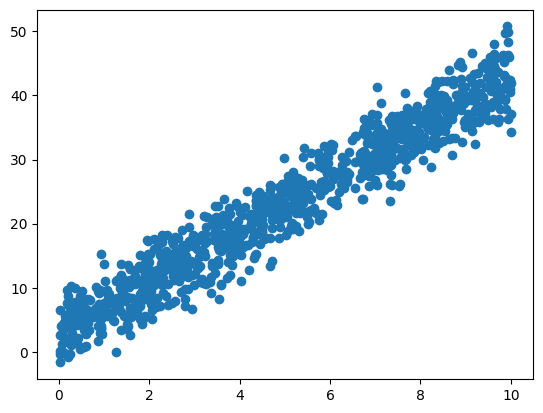

In [42]:
plt.scatter(X, Y)

In [43]:
# L'(x) = f(x)
def Deri(x, y, coeff):
    Top = sum(-2*x*(y - coeff[0][0]*x - coeff[1][0]))/len(x)
    Bot = sum(-2*(y - coeff[0][0]*x - coeff[1][0]))/len(x)
    return np.array([[Top, Bot]]).T

def DoubleDeri(x, y, coeff):
    return np.array([[sum(x**2), sum(x)], [sum(x), len(x)]]) * 2/len(x)

def Norm(Mat):
    return (Mat[0][0]**2 + Mat[1][0]**2)**0.5

    
def NewRaph(x, y, iters = 1e3, eps = 1e-4):
    co = np.array([[5, 10]]).T
    it = 0
    while Norm(Deri(x, y, co)) > eps:
        co = co - np.dot(np.linalg.inv(DoubleDeri(x, y, co)), Deri(x, y, co))
        it += 1
        if (it > iters):
            return "Max Iters"
    return co.T[0]

In [44]:
NewRaph(X, Y)

array([4.00167458, 2.99778743])

In [45]:
def GD(x, y, iters = 1e3, eps = 1e-4, lr = 1e-2):
    co = np.array([[3, 4]]).T
    it = 0
    while Norm(Deri(x, y, co)) > eps:
        iters += 1
        co = co - lr * Deri(x, y, co)
        if iters
    return co.T[0]

In [46]:
GD(X, Y)

array([4.00164385, 2.99799413])